In [21]:
import pandas as pd

In [22]:
df = pd.read_csv(r"C:\Users\kashy\Downloads\Train (3).csv")
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


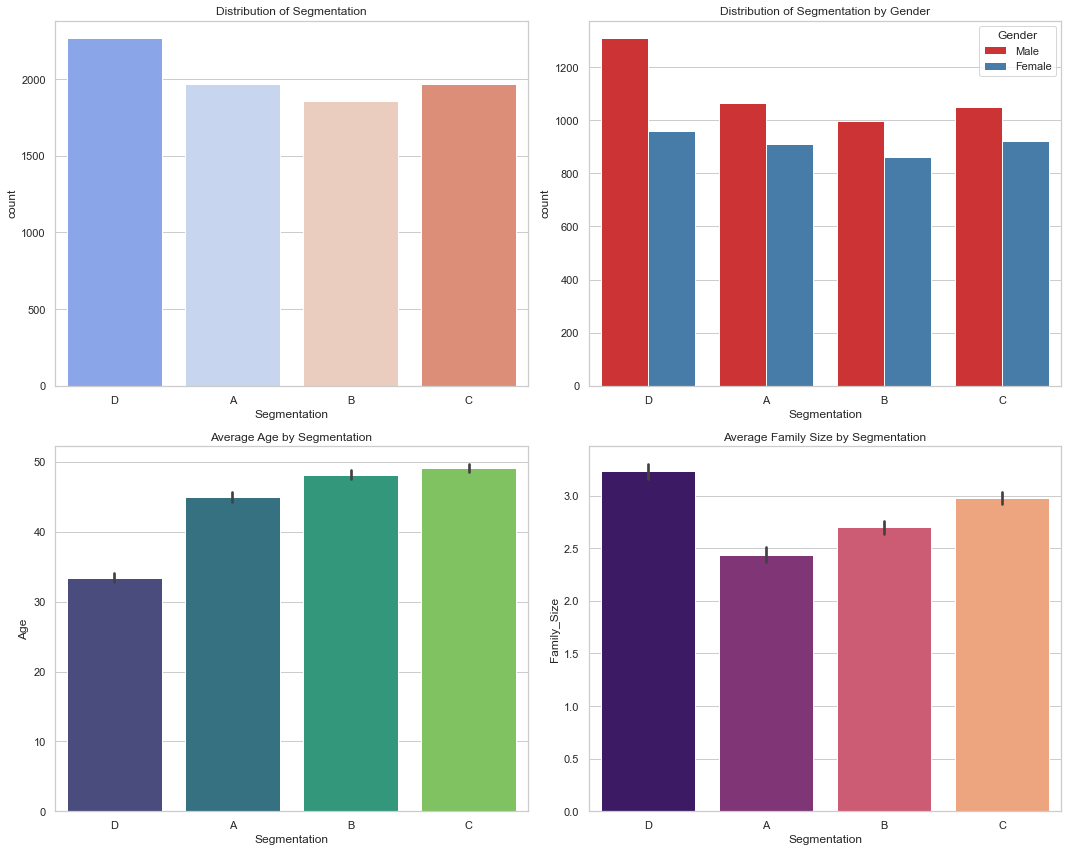

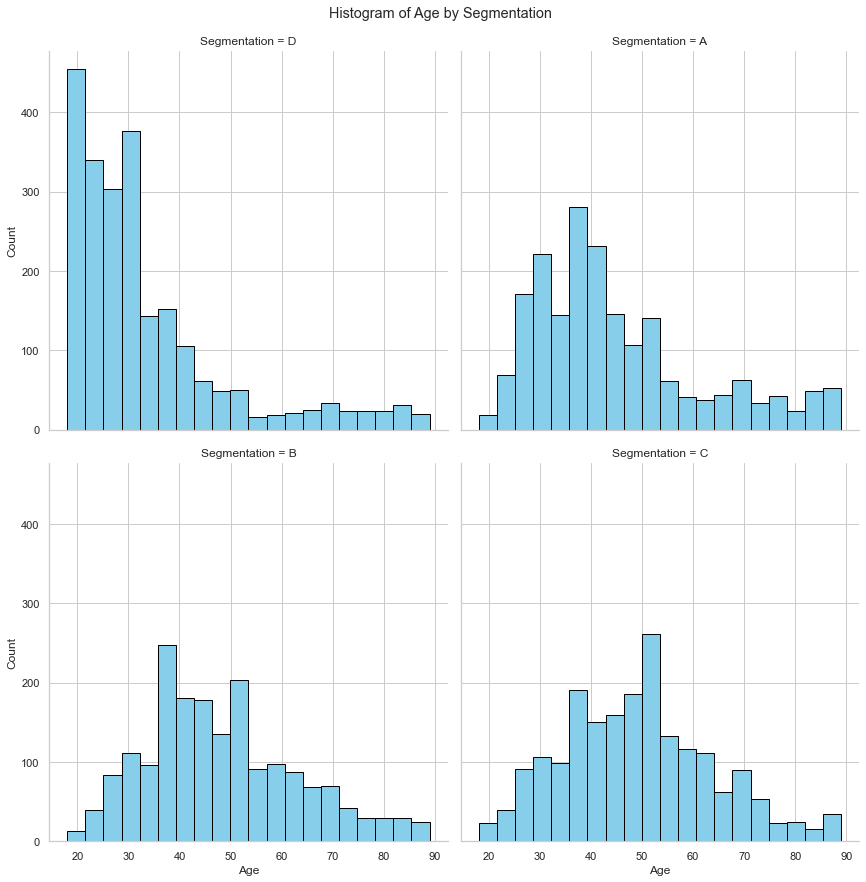

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
sns.set(style="whitegrid")

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribution of Segmentation
sns.countplot(x='Segmentation', data=df, palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Segmentation')

# Distribution of Segmentation by Gender
sns.countplot(x='Segmentation', hue='Gender', data=df, palette='Set1', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Segmentation by Gender')

# Bar plot of Age by Segmentation
sns.barplot(x='Segmentation', y='Age', data=df, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Average Age by Segmentation')

# Bar plot of Family Size by Segmentation
sns.barplot(x='Segmentation', y='Family_Size', data=df, palette='magma', ax=axes[1, 1])
axes[1, 1].set_title('Average Family Size by Segmentation')

# Adjust layout
plt.tight_layout()

# Show histogram for Age by Segmentation separately
g = sns.FacetGrid(df, col='Segmentation', height=6, aspect=1, col_wrap=2)
g.map(plt.hist, 'Age', bins=20, color='skyblue', edgecolor='black')
g.set_axis_labels('Age', 'Count')
g.fig.suptitle('Histogram of Age by Segmentation', y=1.02)

# Show the plots
plt.show()


Dropping the ID column because it is of no relevance for training the model

In [3]:
print(df)

          ID  Gender Ever_Married  Age Graduated     Profession  \
0     462809    Male           No   22        No     Healthcare   
1     462643  Female          Yes   38       Yes       Engineer   
2     466315  Female          Yes   67       Yes       Engineer   
3     461735    Male          Yes   67       Yes         Lawyer   
4     462669  Female          Yes   40       Yes  Entertainment   
...      ...     ...          ...  ...       ...            ...   
8063  464018    Male           No   22        No            NaN   
8064  464685    Male           No   35        No      Executive   
8065  465406  Female           No   33       Yes     Healthcare   
8066  467299  Female           No   27       Yes     Healthcare   
8067  461879    Male          Yes   37       Yes      Executive   

      Work_Experience Spending_Score  Family_Size  Var_1 Segmentation  
0                 1.0            Low          4.0  Cat_4            D  
1                 NaN        Average          3.0  

In [4]:
df.drop('ID',axis=1,inplace=True)

OneHotEncoding and Label Encoding

In [5]:
df = pd.concat([df,pd.get_dummies(df[['Gender','Ever_Married','Graduated']],drop_first=True)],axis=1)
df.drop(['Gender','Ever_Married','Graduated'],axis=1,inplace=True)

In [6]:
df['Spending_Score'].replace(df['Spending_Score'].unique(),[0,1,2],inplace=True)

In [7]:
df['Profession'].replace(df['Profession'].unique(),range(len(df['Profession'].unique())),inplace=True)

In [8]:
df

,Age,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Gender_Male,Ever_Married_Yes,Graduated_Yes
0,22,0,1.0,0,4.0,Cat_4,D,1,0,0
1,38,1,NaN,1,3.0,Cat_4,A,0,1,1
2,67,1,1.0,0,1.0,Cat_6,B,0,1,1
3,67,2,0.0,2,2.0,Cat_6,B,1,1,1
4,40,3,NaN,2,6.0,Cat_6,A,0,1,1
...,...,...,...,...,...,...,...,...,...,...
8063,22,9,0.0,0,7.0,Cat_1,D,1,0,0
8064,35,5,3.0,0,4.0,Cat_4,D,1,0,0
8065,33,0,1.0,0,1.0,Cat_6,D,0,0,1
8066,27,0,1.0,0,4.0,Cat_6,B,0,0,1


Handling Null Values

In [9]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='most_frequent')
df[df.columns] = si.fit_transform(df)

Extracting the number from string

In [10]:
df['Var_1'] = df['Var_1'].transform(lambda x:int(x[-1]))

In [11]:
df

,Age,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Gender_Male,Ever_Married_Yes,Graduated_Yes
0,22,0,1.0,0,4.0,4,D,1,0,0
1,38,1,1.0,1,3.0,4,A,0,1,1
2,67,1,1.0,0,1.0,6,B,0,1,1
3,67,2,0.0,2,2.0,6,B,1,1,1
4,40,3,1.0,2,6.0,6,A,0,1,1
...,...,...,...,...,...,...,...,...,...,...
8063,22,9,0.0,0,7.0,1,D,1,0,0
8064,35,5,3.0,0,4.0,4,D,1,0,0
8065,33,0,1.0,0,1.0,6,D,0,0,1
8066,27,0,1.0,0,4.0,6,B,0,0,1


Encoding the dependent variable

In [12]:
df['Segmentation'] = df['Segmentation'].replace(df['Segmentation'].unique(),range(len(df['Segmentation'].unique())))

In [13]:
df

,Age,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Gender_Male,Ever_Married_Yes,Graduated_Yes
0,22,0,1.0,0,4.0,4,0,1,0,0
1,38,1,1.0,1,3.0,4,1,0,1,1
2,67,1,1.0,0,1.0,6,2,0,1,1
3,67,2,0.0,2,2.0,6,2,1,1,1
4,40,3,1.0,2,6.0,6,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
8063,22,9,0.0,0,7.0,1,0,1,0,0
8064,35,5,3.0,0,4.0,4,0,1,0,0
8065,33,0,1.0,0,1.0,6,0,0,0,1
8066,27,0,1.0,0,4.0,6,2,0,0,1


In [14]:
X = df.drop('Segmentation',axis=1)
y = df['Segmentation']

Dimensionality reduction

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier()
]

In [19]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf.__class__.__name__} Accuracy: {accuracy}")

LogisticRegression Accuracy: 0.3976717987232445
DecisionTreeClassifier Accuracy: 0.35936913255726627
RandomForestClassifier Accuracy: 0.40480660908749533
SVC Accuracy: 0.44611340593315807
KNeighborsClassifier Accuracy: 0.40518212542245585
